<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 80 columns):
UID                            39030 non-null int64
BLOCKID                        0 non-null float64
SUMLEVEL                       39030 non-null int64
COUNTYID                       39030 non-null int64
STATEID                        39030 non-null int64
state                          39030 non-null object
state_ab                       39030 non-null object
city                           39030 non-null object
place                          39030 non-null object
type                           39030 non-null object
primary                        39030 non-null object
zip_code                       39030 non-null int64
area_code                      39030 non-null int64
lat                            39030 non-null float64
lng                            39030 non-null float64
ALand                          39030 non-null int64
AWater                         39030 non-null int64

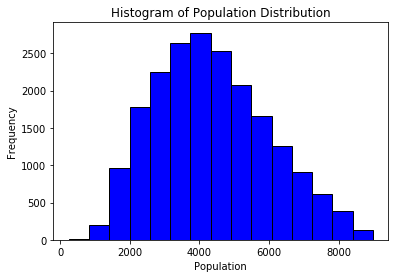

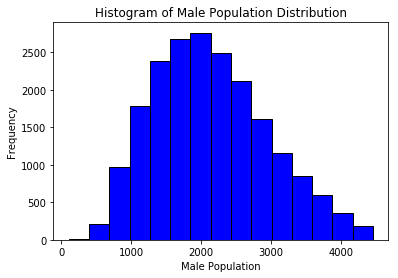

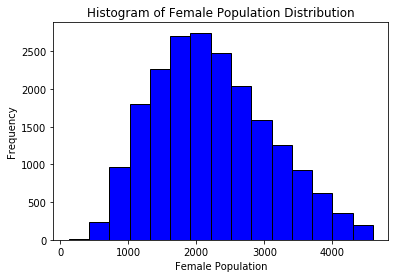

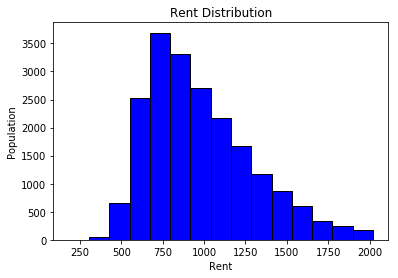

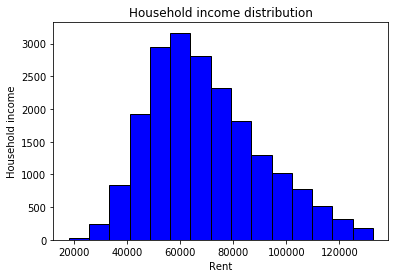

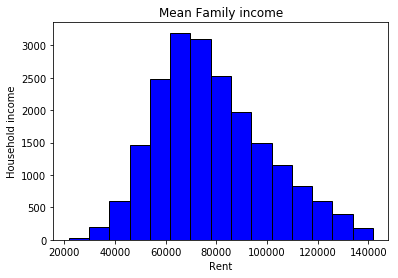

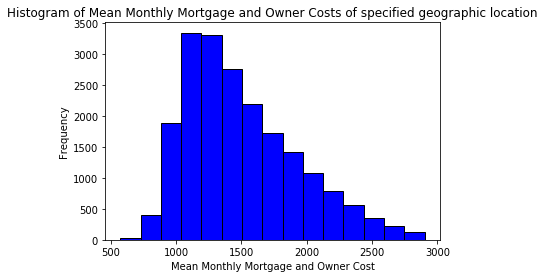

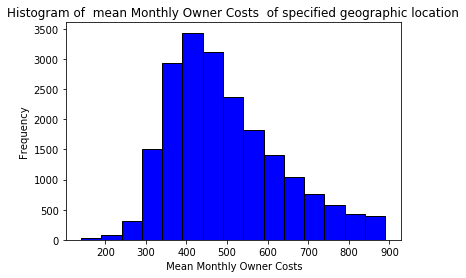

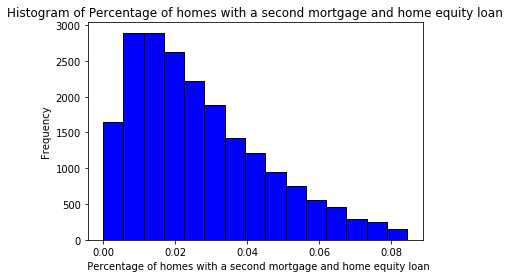

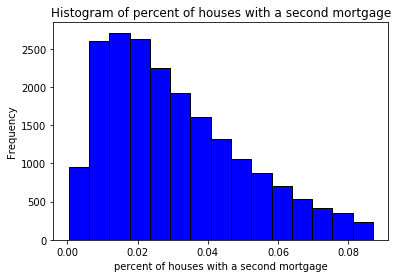

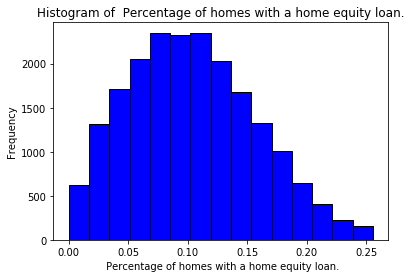

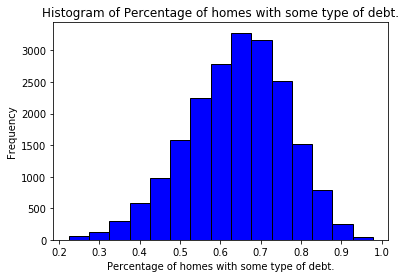

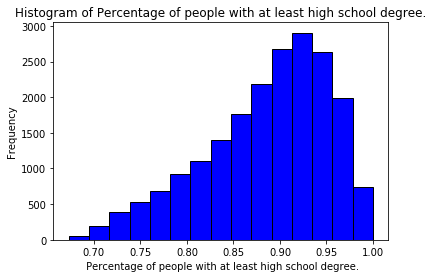

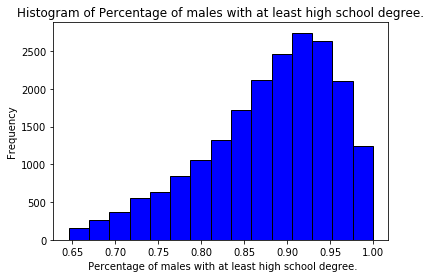

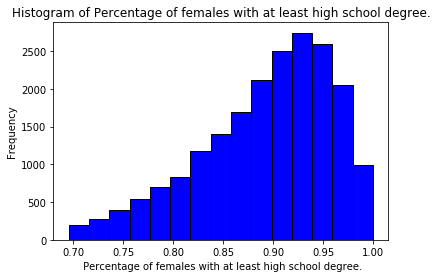

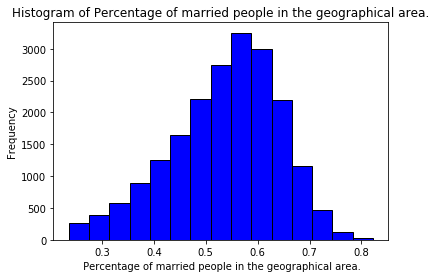

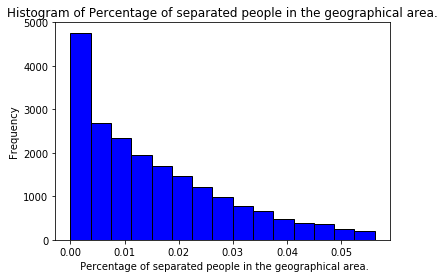

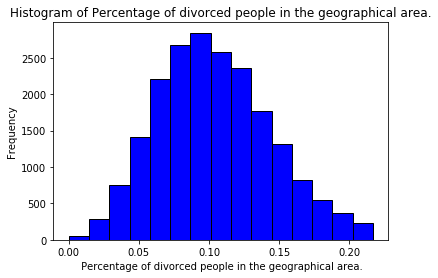

[[2089  433]
 [ 211 2315]]


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2522
           1       0.84      0.92      0.88      2526

   micro avg       0.87      0.87      0.87      5048
   macro avg       0.88      0.87      0.87      5048
weighted avg       0.88      0.87      0.87      5048



KNN Classifier Accuracy :  87.24247226624405


KNN Regressor Accuracy :  75.94454127054921




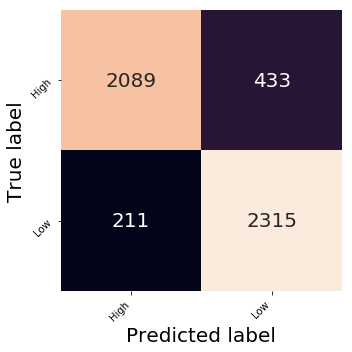

[[2193  329]
 [ 245 2281]]


              precision    recall  f1-score   support

        High       0.90      0.87      0.88      2522
         Low       0.87      0.90      0.89      2526

   micro avg       0.89      0.89      0.89      5048
   macro avg       0.89      0.89      0.89      5048
weighted avg       0.89      0.89      0.89      5048



SVM Classifier Accuracy :  88.62916006339144


SVM Regression Accuracy :  63.104705191667456


[[-0.04479441  0.00139878 -0.08783369 -0.79530368 -0.50073983 -0.97600248
  -1.03289135  0.11636946 -0.21561072 -0.26770088  0.00188708 -0.51094563
   0.47844307  0.48146322 -0.13833327  0.06575299  0.14552552 -0.03464633]]


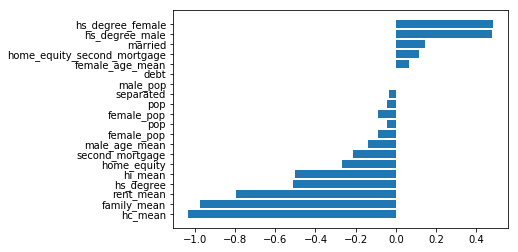

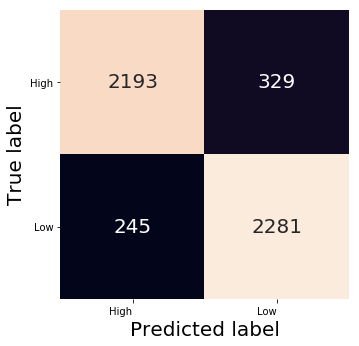



Logistic Regression Accuracy :  84.86529318541997


ROC_AUC :  92.67181973612416




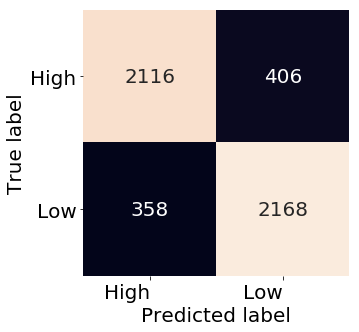

Decision Tree Classifier Accuracy :  63.86687797147385
Decision Tree Regression Accuracy :  73.13380066038941


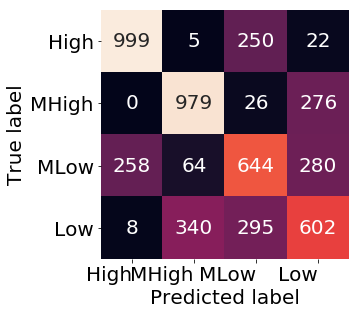

Ensambling Accuracy :  85.18225039619651
Random Forest Regression Accuracy :  79.45078127274627


In [10]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# In[2]:


#loading data
debtdata = pd.read_csv('real_estate_db.csv', encoding='latin-1')


# In[57]:


#information about the dataset
print(debtdata.info())
nulls = debtdata.isna().sum()
print("Null values for each column before any modifications:\n")
print(nulls)


# In[4]:


#creating new data frame- dropping all columns that are not needed
modd=debtdata.copy(deep=True)
modd = modd.drop(['SUMLEVEL','rent_median','rent_stdev','used_samples','hi_median','hi_stdev','hc_mortgage_median','hc_mortgage_stdev','hc_mortgage_samples'], axis=1)

modd  = modd.drop(['rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50'], axis=1)

modd  = modd.drop(['hc_median','hc_stdev','hc_samples','family_median','family_stdev','family_samples','rent_samples'], axis=1)

modd  = modd.drop(['male_age_median','male_age_stdev','male_age_samples','female_age_median','female_age_stdev','female_age_samples'], axis=1)

modd= modd.drop(['rent_sample_weight','family_sample_weight','universe_samples','hi_samples','hi_sample_weight','married_snp','pct_own','female_age_sample_weight','male_age_sample_weight','hc_sample_weight','hc_mortgage_sample_weight'],axis=1)


modd=modd.drop('BLOCKID',axis=1)
modd.info()


# In[5]:


#changing the datatypes of certain columns to object
modd['UID'] = modd['UID'].astype('object')
modd['COUNTYID'] = modd['COUNTYID'].astype('object')
modd['STATEID'] = modd['STATEID'].astype('object')
modd['zip_code'] = modd['zip_code'].astype('object')
modd['area_code'] = modd['area_code'].astype('object')

#so that the outlier function can ignore these variables
modd['lat'] = modd['lat'].astype('object')
modd['lng'] = modd['lng'].astype('object')
modd['ALand'] = modd['ALand'].astype('object')
modd['AWater'] = modd['AWater'].astype('object')
print(modd.info())


# ## Checking for null values:

# In[58]:


nulls = modd.isna().sum()
print("Null values for each column after modifications:\n")
print(nulls)


# ## Elimnating Outliers

# In[59]:


#function to remove outliers
def remove_outliers(df):
    for name in df.columns:
        if is_numeric_dtype(df[name]):
            q1 = df[name].quantile(0.25)
            q3 = df[name].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            df = df[(df[name] > lower_bound) & (df[name] < upper_bound)]
    return df

# preparing data for elimnating outliers
#modd_w_in=modd.drop(["COUNTYID","STATEID","state","state_ab","city","place","type","primary","zip_code","area_code","lat","lng","ALand","AWater"],axis=1)
#m2=modd.loc[:,"pop":]
#mod_w_in=m1.append(m2, ignore_index=True)
#elimnating outliers
modd_w_out = remove_outliers(modd)


# In[60]:


#checking for duplicates
dup = modd_w_out[modd_w_out.duplicated(["UID","pop"])]
#there are no duplicates we move onto merging the data
#merging the data
#modd_merged = pd.merge(left=modd_w_out,right=modd_w_in, how='inner', left_on='UID', right_on='UID')
#final_modd_merged = pd.merge(left=modd,right=modd_merged, how='inner', left_on='UID', right_on='UID')
#final_modd_merged.info()
#print(final_modd_merged.head(2))
#geoginfo=modd_w_out.loc[:,"UID":"AWater"]
#maleinfo=modd_w_out.loc[:,["UID","male_pop","hs_degree_male"]]


# In[8]:




# In[61]:


#converting back the orignal data types so that we can perform analysis
modd_w_out['lat'] = modd_w_out['lat'].astype('float64')
modd_w_out['lng'] = modd_w_out['lng'].astype('float64')
modd_w_out['ALand'] = modd_w_out['ALand'].astype('int64')
modd_w_out['AWater'] = modd_w_out['AWater'].astype('int64')
new_nulls=modd_w_out.isna().sum()
#data=data.fillna(data.mean()[:])
print("FINAL DATA SET:",new_nulls)


# ## Visualization

# In[10]:


plt.hist(modd_w_out["pop"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title(r'Histogram of Population Distribution')
plt.show()


# In[11]:


plt.hist(modd_w_out["male_pop"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Male Population')
plt.ylabel('Frequency')
plt.title(r'Histogram of Male Population Distribution')
plt.show()


# In[12]:


plt.hist(modd_w_out["female_pop"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Female Population')
plt.ylabel('Frequency')
plt.title(r'Histogram of Female Population Distribution')
plt.show()


# In[13]:


plt.hist(modd_w_out["rent_mean"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Rent')
plt.ylabel('Population')
plt.title(r'Rent Distribution')
plt.show()



# In[14]:


plt.hist(modd_w_out["hi_mean"],bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Rent')
plt.ylabel('Household income')
plt.title(r'Household income distribution')
plt.show()


# In[15]:


plt.hist(modd_w_out["family_mean"],bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Rent')
plt.ylabel('Household income')
plt.title(r'Mean Family income')
plt.show()


# In[16]:


plt.hist(modd_w_out["hc_mortgage_mean"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Mean Monthly Mortgage and Owner Cost')
plt.ylabel('Frequency')
plt.title(r'Histogram of Mean Monthly Mortgage and Owner Costs of specified geographic location')
plt.show()


# In[17]:


plt.hist(modd_w_out["hc_mean"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Mean Monthly Owner Costs')
plt.ylabel('Frequency')
plt.title(r'Histogram of  mean Monthly Owner Costs  of specified geographic location')
plt.show()


# In[18]:


plt.hist(modd_w_out["home_equity_second_mortgage"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('  Percentage of homes with a second mortgage and home equity loan')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of homes with a second mortgage and home equity loan')
plt.show()


# In[19]:


plt.hist(modd_w_out["second_mortgage"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('percent of houses with a second mortgage')
plt.ylabel('Frequency')
plt.title(r'Histogram of percent of houses with a second mortgage')
plt.show()


# In[20]:


plt.hist(modd_w_out["home_equity"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of homes with a home equity loan.')
plt.ylabel('Frequency')
plt.title(r'Histogram of  Percentage of homes with a home equity loan.')
plt.show()


# In[21]:


plt.hist(modd_w_out["debt"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel('Percentage of homes with some type of debt.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of homes with some type of debt.')
plt.show()


# In[22]:


plt.hist(modd_w_out["hs_degree"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of people with at least high school degree.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of people with at least high school degree.')
plt.show()


# In[23]:


plt.hist(modd_w_out["hs_degree_male"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of males with at least high school degree.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of males with at least high school degree.')
plt.show()


# In[24]:


plt.hist(modd_w_out["hs_degree_female"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of females with at least high school degree.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of females with at least high school degree.')
plt.show()


# In[25]:


plt.hist(modd_w_out["married"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of married people in the geographical area.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of married people in the geographical area.')
plt.show()


# In[26]:


plt.hist(modd_w_out["separated"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of separated people in the geographical area.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of separated people in the geographical area.')
plt.show()


# In[27]:


plt.hist(modd_w_out["divorced"], bins = 15, color = 'blue', edgecolor = 'black')
plt.xlabel(' Percentage of divorced people in the geographical area.')
plt.ylabel('Frequency')
plt.title(r'Histogram of Percentage of divorced people in the geographical area.')
plt.show()


# ## Performing KNN

# In[105]:


#Regressions

import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import tree
import collections
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import webbrowser
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

numfeatures = (    
'pop',
'male_pop',
'female_pop',
'rent_mean',
'hi_mean',
'family_mean',
'hc_mean',
'home_equity_second_mortgage',
'second_mortgage',
'home_equity',
'debt',   
'hs_degree',
'hs_degree_male',
'hs_degree_female',
'male_age_mean',
'female_age_mean',
'married',
'separated'
)
#'debt_cdf',
#'home_equity_cdf',

# Recategorize debt column to categorical for analysis

median_debt = float(modd_w_out.loc[:,"hc_mortgage_mean"].median())
LowerQ_debt = float(modd_w_out.loc[:,"hc_mortgage_mean"].quantile(0.25))
UpperQ_debt = float(modd_w_out.loc[:,"hc_mortgage_mean"].quantile(0.75))


modd_w_out['morg_cat_logit'] = np.where(modd_w_out['hc_mortgage_mean'] <= median_debt, 'Low', 'High')


modd_w_out['morg_cat_dt'] = np.where(modd_w_out['hc_mortgage_mean'] <= LowerQ_debt, 'Low',
                                  np.where(modd_w_out['hc_mortgage_mean'] <= median_debt, 'MLow',
                                           np.where(modd_w_out['hc_mortgage_mean'] < UpperQ_debt, 'MHigh', 'High')))









# ## KNN:

#splitting data into training and testing data
X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
y=(modd_w_out.loc[:,"morg_cat_logit"])# target variable
#y=(modd_w_out.loc[:,"debt_cat_dt"])# target variable
ry = (modd_w_out.loc[:,"hc_mortgage_mean"])# target variable

class_le = LabelEncoder()
y = class_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
rX_train, rX_test, ry_train, ry_test = train_test_split(X, ry, test_size=0.25, random_state=4)

#scalling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rX_train = scaler.transform(rX_train)
rX_test = scaler.transform(rX_test)

#Running a Model for Regression and Classification
KNNclassifier = KNeighborsClassifier(n_neighbors=9)
KNNregressor = KNeighborsRegressor(n_neighbors=9)
knnC = KNNclassifier.fit(X_train, y_train)
knnR = KNNregressor.fit(rX_train, ry_train)

#Classification Prediction Values
y_pred = KNNclassifier.predict(X_test)

#Classification Analysis
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

#printing the accuracy score
print("KNN Classifier Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")
print("KNN Regressor Accuracy : ", knnR.score(rX_test, ry_test) * 100)
print("\n")

# Displaying confusion matrix
class_names = modd_w_out.loc[:,"morg_cat_logit"].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()











# ## SVR:

X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
y=(modd_w_out.loc[:,"morg_cat_logit"])# target variable
#y=(modd_w_out.loc[:,"debt_cat_dt"])# target variable
yr=(modd_w_out.loc[:,"hc_mortgage_mean"])# target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
rX_train, rX_test, ry_train, ry_test = train_test_split(X, yr, test_size=0.25, random_state=4)

class_le = LabelEncoder()
y = class_le.fit_transform(y)

#scalling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rX_train = scaler.transform(rX_train)
rX_test = scaler.transform(rX_test)

#fitting the SVR to the dataset
SVMclassifier = SVC(kernel = 'linear')
SVMregressor = SVR(kernel = 'rbf')
svc = SVMclassifier.fit(X_train, y_train)
svm = SVMregressor.fit(rX_train, ry_train)

#Classification Prediction Values
y_pred = SVMclassifier.predict(X_test)

#Classification Analysis
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

#printing the accuracy score
print("SVM Classifier Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")
print("SVM Regression Accuracy : ", svm.score(rX_test, ry_test) * 100)
print("\n")

#print(regressor.predict([[1,2,3,4,5,6,7,8]]))

def coef_values(coef, names):
    imp = coef
    print(imp)
    imp,names = zip(*sorted(zip(imp.ravel(),names)))

    imp_pos_10 = imp[-10:]
    names_pos_10 = names[-10:]
    imp_neg_10 = imp[:10]
    names_neg_10 = names[:10]

    imp_top_20 = imp_neg_10+imp_pos_10
    names_top_20 =  names_neg_10+names_pos_10

    plt.barh(range(len(names_top_20)), imp_top_20, align='center')
    plt.yticks(range(len(names_top_20)), names_top_20)
    plt.show()

# get the column names
features_names = (modd_w_out.loc[:,numfeatures]).columns

# call the function
coef_values(SVMclassifier.coef_, features_names)

#Plot Confusion Matrix

class_names = modd_w_out.loc[:,"morg_cat_logit"].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False,annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
# Show heat map
plt.tight_layout()
plt.show()










## # Logistic Regression:

X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
y=(modd_w_out.loc[:,"morg_cat_logit"])# target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

clf = LogisticRegression()

# performing training
clf.fit(X_train, y_train)

#%%-----------------------------------------------------------------------
# make predictions
# predicton on test
y_pred = clf.predict(X_test)

y_pred_score = clf.predict_proba(X_test)

#%%-----------------------------------------------------------------------
# calculate metrics
print("\n")

print("Logistic Regression Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")

print("ROC_AUC : ", roc_auc_score(y_test,y_pred_score[:,1]) * 100)
print("\n")

# %%-----------------------------------------------------------------------
# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = modd_w_out.loc[:,"morg_cat_logit"].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()



















## # Descision Tree:

X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
ry=(modd_w_out.loc[:,"hc_mortgage_mean"])# target variable
y=(modd_w_out.loc[:,"morg_cat_dt"])# target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
rX_train, rX_test, ry_train, ry_test = train_test_split(X, ry, test_size=0.25, random_state=4)

#scalling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rX_train = scaler.transform(rX_train)
rX_test = scaler.transform(rX_test)

treeRegressor = DecisionTreeRegressor(max_depth=5)
treeClassifier = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0)
dtRegressor = treeRegressor.fit(rX_train, ry_train)
dtClassifier = treeClassifier.fit(X_train, y_train)

# predicton on test using entropy
y_pred_entropy = treeClassifier.predict(X_test)
print("Decision Tree Classifier Accuracy : ", accuracy_score(y_test, y_pred_entropy) * 100)
print("Decision Tree Regression Accuracy : ", dtRegressor.score(rX_test, ry_test) * 100)

# confusion matrix for entropy model
conf_matrix = confusion_matrix(y_test, y_pred_entropy)
class_names = modd_w_out.loc[:,"morg_cat_dt"].unique()
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()

#%%-----------------------------------------------------------------------
# display decision tree

dot_data1 = export_graphviz(dtRegressor, filled=True, rounded=True, class_names=class_names, feature_names=modd_w_out.loc[:,numfeatures].columns, out_file=None)
dot_data2 = export_graphviz(dtClassifier, filled=True, rounded=True, class_names=class_names, feature_names=modd_w_out.loc[:,numfeatures].columns, out_file=None)



graph1 = graph_from_dot_data(dot_data1)
graph2 = graph_from_dot_data(dot_data2)
graph1.write_pdf("decision_tree_entropy1.pdf")
graph2.write_pdf("decision_tree_entropy2.pdf")
webbrowser.open_new(r'decision_tree_entropy1.pdf')
webbrowser.open_new(r'decision_tree_entropy2.pdf')











# ## Ensambling:

X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
y=(modd_w_out.loc[:,"morg_cat_logit"])# target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
model3 = SVMclassifier = SVC(kernel = 'linear')
model4 = KNNclassifier = KNeighborsClassifier(n_neighbors=9)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#    ,('SVM', model3) ,('KNN', model4)
model.fit(X_train,y_train)
print("Ensambling Accuracy : ", model.score(X_test, y_test) * 100)

# ## Ensambling (Bagging):

bag1 = modd_w_out.sample(2000)

X1=(bag1.loc[:,numfeatures])#variables to fit the data
y1=(bag1.loc[:,"morg_cat_logit"])# target variable
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=4)

model1 = DecisionTreeClassifier()
model1.fit(X1_train,y1_train)
pred1=model1.predict_proba(X1_test)

bag2 = modd_w_out.sample(2000)

X2=(bag2.loc[:,numfeatures])#variables to fit the data
y2=(bag2.loc[:,"morg_cat_logit"])# target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=4)

model2 = DecisionTreeClassifier()
model2.fit(X2_train,y2_train)
pred2=model1.predict_proba(X2_test)

finalpred=(pred1+pred2)/2

# ## Ensambling (Random Forest):

X=(modd_w_out.loc[:,numfeatures])#variables to fit the data
ry=(modd_w_out.loc[:,"hc_mortgage_mean"])# target variable
RFregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rX_train, rX_test, ry_train, ry_test = train_test_split(X, ry, test_size=0.25, random_state=4)

RFR = RFregressor.fit(rX_train, ry_train)

print("Random Forest Regression Accuracy : ", RFR.score(rX_test, ry_test) * 100)